## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head() 
#study_results.head()
# Combine the data into a single dataset
#school_data_complete = pd.merge(student_data, school_data, how="left", on=["Mouse ID", "school_name"])

data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])
# Display the data table for preview

data_complete = data_complete.rename(columns={"Weight (g)": "Weight", 
                                              "Tumor Volume (mm3)":"Tumor Volume", 
                                              "Age_months":"Age Months"})
#data_complete.head()
data_complete.to_csv("Output2.csv", index=True, header=True)

In [47]:
#data_complete.describe()

In [48]:
# Checking the number of mice.
mice_df =data_complete.loc[:,["Mouse ID", "Timepoint"]]

In [49]:
#mice_grp = mice_df.groupby("Mouse ID")
#mice_grp["Timepoint"].count().sort_values(ascending=False)

mice_g989 = mice_df.loc[mice_df["Mouse ID"]=="g989",:]
mice_g989.head(100)
#Mouse ID g989    13 is the mouse with duplicate values. 
#this mouse id will be removed from the original df

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean_df = data_complete[data_complete["Mouse ID"]!='g989']


In [51]:
# Checking the number of mice in the clean DataFrame.
data_clean_df.loc[data_clean_df["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age Months,Weight,Timepoint,Tumor Volume,Metastatic Sites


## Summary Statistics

In [52]:
#data_clean_df.head()

In [53]:
# Generate a summary statistics table of mean, 
# median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugreg_grp = data_clean_df.set_index("Drug Regimen").groupby(["Drug Regimen"])

tumor_summary = pd.DataFrame({"Tumor Vol Mean": drugreg_grp["Tumor Volume"].mean(), 
                              "Tumor Vol Median": drugreg_grp["Tumor Volume"].median(),
                              "Tumor Vol Var":  drugreg_grp["Tumor Volume"].var(),
                              "Tumor Vol STD": drugreg_grp["Tumor Volume"].std(),
                              "Tumor Vol SEM": drugreg_grp["Tumor Volume"].sem()
                            })

tumor_summary.round(4)

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Var,Tumor Vol STD,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3209,50.4463,43.8520,6.6221,0.5443
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drugreg_grp.agg({"Tumor Volume": ['mean', 'median','var','std','sem']}).round(4)

Tumor Volume                                  
                     mean   median      var     std     sem
Drug Regimen                                               
Capomulin         40.6757  41.5578  24.9478  4.9948  0.3293
Ceftamin          52.5912  51.7762  39.2902  6.2682  0.4698
Infubinol         52.8848  51.8206  43.1287  6.5672  0.4922
Ketapril          55.2356  53.6987  68.5536  8.2797  0.6039
Naftisol          54.3316  52.5093  66.1735  8.1347  0.5965
Placebo           54.0336  52.2889  61.1681  7.8210  0.5813
Propriva          52.3209  50.4463  43.8520  6.6221  0.5443
Ramicane          40.2167  40.6732  23.4867  4.8463  0.3210
Stelasyn          54.2331  52.4317  59.4506  7.7104  0.5731
Zoniferol         53.2365  51.8185  48.5334  6.9666  0.5164

## Bar and Pie Charts

In [55]:
drugreg_grp["Mouse ID"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

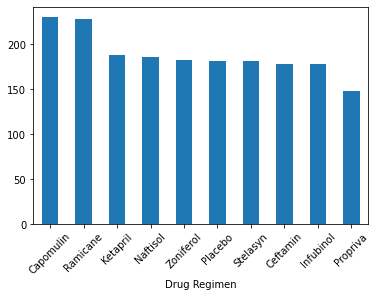

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#data_clean_df.plot(x= "Drug Regimen", y="Mouse ID", kind='bar')
drg_bar =drugreg_grp.count().sort_values(["Mouse ID"], ascending=False)["Mouse ID"].plot(kind='bar', rot=45)

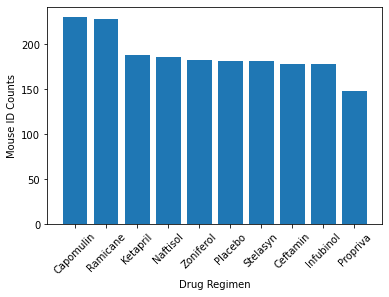

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_cnt = data_clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_cnt))

plt.bar(x_axis, drug_cnt)
xticks = [x for x in x_axis]
plt.xticks(xticks, drug_cnt.index.values, rotation=45)
plt.ylabel("Mouse ID Counts")
plt.xlabel("Drug Regimen")
plt.show()

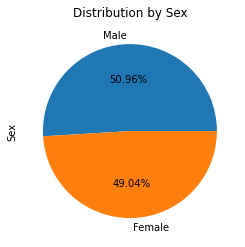

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


pie_data = data_clean_df["Sex"].value_counts()

plotpie = pie_data.plot(kind='pie', title="Distribution by Sex", autopct ="%1.2f%%") 



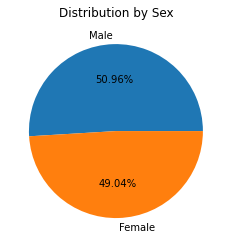

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex_cnt = data_clean_df['Sex'].value_counts()
#x_axis = np.arange(len(Sex_cnt))

plt.pie(Sex_cnt, autopct ="%1.2f%%", labels = Sex_cnt.index.values)
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
